In [1]:
import sys
import time
from datetime import datetime
import pandas as pd
import geopandas as gpd
import numpy as np
import glob as glb
from shapely.geometry import box
from shapely.geometry import Polygon
from shapely.geometry import Point
import shapely.wkt
from datetimerange import DateTimeRange
import datetime as dt
import astropy.units as u
from astropy.coordinates import SkyCoord
from sunpy.coordinates import frames

In [15]:
sharp_out_folder = r'E:\Sharp_hgs_poly'

sharp_files = glb.glob(sharp_out_folder + "/*.csv")

noaa_path = r'C:\Users\Sumi\Desktop\noaa_more_new\noaa_ar_more.csv'

noaa_harp_path = r'C:\Users\Sumi\Desktop\noaa_more_new\noaa_diff\diff_lon.csv'

export_foler = r'E:\\diff_occur_in_my_file\\'

st_form = '%Y-%m-%d %H:%M:%S'

In [38]:
sharp_f_dic = get_sharp(sharp_files)

In [39]:
sharp_f_dic[414]

LAT_MIN    LAT_MAX    LON_MIN    LON_MAX  \
Timestamp                                                         
2011-03-07 17:00:00 -26.993797 -25.915171  49.859489  52.022228   
2011-03-07 17:12:00 -27.080170 -25.718517  49.858730  52.533901   
2011-03-07 17:24:00 -27.148512 -25.706057  49.960342  52.660320   
2011-03-07 17:36:00 -27.376982 -25.614140  49.592655  53.083546   
2011-03-07 17:48:00 -27.433176 -25.518559  49.574478  53.356567   
2011-03-07 18:00:00 -27.479593 -25.503206  49.671600  53.480911   
2011-03-07 18:12:00 -27.503080 -25.495741  49.762623  53.605789   
2011-03-07 18:24:00 -27.524279 -25.486012  49.860874  53.731686   
2011-03-07 18:36:00 -27.545229 -25.476038  49.961525  53.839779   
2011-03-07 18:48:00 -27.551590 -25.466318  50.060158  53.966404   
2011-03-07 19:00:00 -27.703791 -25.456053  49.955021  54.143448   
2011-03-07 19:12:00 -27.725012 -25.451366  50.052769  54.399876   
2011-03-07 19:24:00 -27.746843 -25.442228  50.155354  54.532330   
2011-03-07 19:36:00 -27.768747 -25.433174  50.258228  54.709305   
2011-03-07 19:48:00 -27.763086 -25.427402  50.355843  54.836746   
2011-03-07 20:00:00 -27.778492 -25.442060  50.454487  54.965565   
2011-03-07 20:12:00 -27.773088 -25.415857  50.554024  55.095596   
2011-03-07 20:24:00 -27.791498 -25.408295  50.657501  55.230270   
2011-03-07 20:36:00 -27.782629 -25.399099  50.759689  55.363758   
2011-03-07 20:48:00 -27.787504 -25.388388  50.858768  55.494038   
2011-03-07 21:00:00 -27.791185 -25.376432  50.970093  55.603039   
2011-03-07 21:12:00 -27.786297 -25.366100  51.071304  55.736103   
2011-03-07 21:24:00 -27.801950 -25.355949  51.180511  55.847630   
2011-03-07 21:36:00 -27.795942 -25.344465  51.293617  55.958935   
2011-03-07 21:48:00 -27.800991 -25.334198  51.396694  56.094536   
2011-03-07 22:00:00 -27.821215 -25.328922  51.510788  56.207130   
2011-03-07 22:12:00 -27.835512 -25.342493  51.589127  56.318954   
2011-03-07 22:24:00 -27.852901 -25.333199  51.646378  56.438046   
2011-03-07 22:36:00 -27.874264 -25.329060  51.733379  56.546627   
2011-03-07 22:48:00 -27.915842 -25.325190  51.806770  56.662045   
...                        ...        ...        ...        ...   
2011-03-10 18:48:00 -29.326937 -23.621164  82.880875  93.393738   
2011-03-10 19:00:00 -29.327023 -23.619534  82.976295  93.429916   
2011-03-10 19:12:00 -29.327181 -23.617132  83.073364  93.486618   
2011-03-10 19:24:00 -29.327499 -23.619911  83.232269  93.433647   
2011-03-10 19:36:00 -29.328886 -23.621418  83.329239  93.451385   
2011-03-10 19:48:00 -29.324715 -23.705009  83.435692  93.804268   
2011-03-10 20:00:00 -29.323759 -23.696468  83.534569  93.587349   
2011-03-10 20:12:00 -29.324308 -23.691593  83.639633  93.707817   
2011-03-10 20:24:00 -29.325668 -23.694660  83.746994  93.677040   
2011-03-10 20:36:00 -29.324850 -23.778671  83.847328  93.622261   
2011-03-10 20:48:00 -29.321264 -23.761484  83.971458  93.675018   
2011-03-10 21:00:00 -29.309454 -23.760693  84.067444  93.698845   
2011-03-10 21:12:00 -29.309460 -23.849211  84.169823  93.669258   
2011-03-10 21:24:00 -29.309402 -23.824335  84.283661  93.457535   
2011-03-10 21:36:00 -29.309500 -23.926888  84.399925  93.672379   
2011-03-10 21:48:00 -29.306620 -23.892828  84.522591  93.641251   
2011-03-10 22:00:00 -29.302744 -23.900387  84.633484  93.613029   
2011-03-10 22:12:00 -29.291815 -23.900110  84.730667  93.835938   
2011-03-10 22:24:00 -29.290787 -23.898581  84.844231  93.906815   
2011-03-10 22:36:00 -29.288799 -23.997707  84.967651  93.773796   
2011-03-10 22:48:00 -29.287178 -23.984457  85.089920  93.602249   
2011-03-10 23:00:00 -29.285904 -24.073286  85.207359  93.567711   
2011-03-10 23:12:00 -29.284922 -24.042179  85.323227  93.466560   
2011-03-10 23:24:00 -29.275412 -24.143522  85.446762  93.512535   
2011-03-10 23:36:00 -29.241385 -24.235121  85.558441  93.502937   
2011-03-10 23:48:00 -29.242159 -24.235355  85.683868  93.554314   
2011-03-11 00:00:00 -29.240236 -24.314528  85.808060  93.755173   
201

In [28]:
list(sharp_f_dic[414].index.values)

[numpy.datetime64('2011-03-07T17:00:00.000000000'),
 numpy.datetime64('2011-03-07T17:12:00.000000000'),
 numpy.datetime64('2011-03-07T17:24:00.000000000'),
 numpy.datetime64('2011-03-07T17:36:00.000000000'),
 numpy.datetime64('2011-03-07T17:48:00.000000000'),
 numpy.datetime64('2011-03-07T18:00:00.000000000'),
 numpy.datetime64('2011-03-07T18:12:00.000000000'),
 numpy.datetime64('2011-03-07T18:24:00.000000000'),
 numpy.datetime64('2011-03-07T18:36:00.000000000'),
 numpy.datetime64('2011-03-07T18:48:00.000000000'),
 numpy.datetime64('2011-03-07T19:00:00.000000000'),
 numpy.datetime64('2011-03-07T19:12:00.000000000'),
 numpy.datetime64('2011-03-07T19:24:00.000000000'),
 numpy.datetime64('2011-03-07T19:36:00.000000000'),
 numpy.datetime64('2011-03-07T19:48:00.000000000'),
 numpy.datetime64('2011-03-07T20:00:00.000000000'),
 numpy.datetime64('2011-03-07T20:12:00.000000000'),
 numpy.datetime64('2011-03-07T20:24:00.000000000'),
 numpy.datetime64('2011-03-07T20:36:00.000000000'),
 numpy.datet

In [12]:

def get_sharp(file_path):
        
    data_sharp ={}
    
    for filename in file_path:

        #ubuntun harp_name = filename.split("/")[-1].rstrip('.csv')
        harp_name = filename.split("\\")[-1].rstrip('.csv')
        
        df = pd.read_csv(filename, header=0,parse_dates=True,date_parser=pd.to_datetime,index_col='Timestamp')
        
        df['hgs_poly'] = df['hgs_poly'].apply(lambda row: shapely.wkt.loads(row) if type(row) is str else None )
        
        data_sharp[int(harp_name)] = df
        
    
    return data_sharp



#get noaa file as dataframe
def get_noaa(file_path):
    
    df = pd.read_csv(file_path)
    

    df['ar_time'] = pd.to_datetime(df['ar_time'])
    
    
    
    #df['geo_point'] = df['geo_point'].apply(shapely.wkt.loads)
    
    print('finish loading Noaa')
    
    return df



#get HARP TO NOAA NUMBER match dictionary
def get_noaa_harp_map(file_path,c_name):
    
    df = pd.read_csv(file_path)
    
    df[c_name] = df[c_name].apply(lambda row: list(map(int,row.strip('[]').split(','))) if type(row) is str else None)
    
    df_map = {row['HARPNUM']:row[c_name] for idx,row in df.iterrows()}
    
    return df_map


#lon,lat --x,y
def coord_transformer(lon,lat,edate):
#     lon = x['LON_MIN']
#     lat = x['LAT_MIN']
#     edate = x['Timestamp']
    c = SkyCoord(lon*u.deg, lat*u.deg, frame=frames.HeliographicStonyhurst, obstime=edate)
    c_hpc = c.transform_to(frames.Helioprojective)
    return c_hpc.Tx.arcsec,c_hpc.Ty.arcsec #Tx,Ty


def calculate_lon_delta(lat_degree, day):
    alpha = 14.11
    beta = -1.7
    gamma = -2.35

    velocity_in_deg = alpha + beta * (np.sin(np.deg2rad(lat_degree))) ** 2 + gamma * (np.sin(np.deg2rad(lat_degree))) ** 4
    delta_lon = velocity_in_deg * day
    return delta_lon


def new_lon(o_lon,o_lat,edate,b_time):
    
    t_diff_dat = (edate - b_time)/ pd.Timedelta('1 day')

# ar_lat = ar_record[0]['latitude']
#         ar_lon = ar_record[0]['central_meridian_dist']

#         t_diff_day = ar_record[0]['diff'] 
        #         print t_diff_day
    new_ar_lon = o_lon + calculate_lon_delta(o_lat, -t_diff_dat)
    
    if new_ar_lon > 90:
        new_ar_lon = 90
        
    elif new_ar_lon < -90:
        new_ar_lon = -90
        
    return new_ar_lon




In [40]:
def matching_process():
    

    
    noaa_df = get_noaa(noaa_path)
    
    noaa_sharp_dic = get_noaa_harp_map(noaa_harp_path,'diff_noaa_in_lon')
    
    
    #check each harp_num
    for key_harp in noaa_sharp_dic:
        
        if noaa_sharp_dic[key_harp] !=None:
            
            print("processing:" + str(key_harp))
            
            for idx,noaa_no in enumerate(noaa_sharp_dic[key_harp]):
                
#                 print(noaa_no)
                
                noaa_idx = noaa_df[noaa_df['noaa_ar_no']==noaa_no].index.values
                
                for n in noaa_idx:
                    
#                     print(n)
                    
                    st_time = (noaa_df.loc[n,'ar_time'] - dt.timedelta(hours = 12)).strftime(st_form)
                    
                    ed_time = (noaa_df.loc[n,'ar_time'] + dt.timedelta(hours = 11,minutes =48)).strftime(st_form)
                    
                    
                    #retrieve geometry not none index
                    geo_not_null_idx = sharp_f_dic[key_harp]['hgs_poly'].notnull()
                    
                    noaa_harp_idx = sharp_f_dic[key_harp][geo_not_null_idx].loc[st_time : ed_time].index.values
                    
#                     print(noaa_harp_idx)
                    
                    if len(noaa_harp_idx)>0:  #noaa number has time intersection with harp
                        
#                         print(n)
                        
                        for b in noaa_harp_idx:
                            
#                             print(b)
                            
#                             print(key_harp)
                            
                            
                            poly_sharp = sharp_f_dic[key_harp].loc[b,'hgs_poly']#
                            
                            noaa_lon = noaa_df.loc[n,'longitude']
                        
                            noaa_lat = noaa_df.loc[n,'latitude']
                        
                            noaa_date = noaa_df.loc[n,'ar_time']
                        
                            noaa_new_lon = new_lon(noaa_lon,noaa_lat,noaa_date,b)
                            
                            point_noaa = Point(noaa_new_lon, noaa_lat)
                            
                            noaa_info = str(n)+':'+ str(noaa_df.loc[n,'noaa_ar_no'])
                            
                            
                            #check point noaa in poly_sharp
                            if point_noaa.within(poly_sharp):
                                
                                if 'noaa_interpolate_lon' not in sharp_f_dic[key_harp].columns:
                                    
                                    sharp_f_dic[key_harp]['noaa_num'] = ''
                                        
                                    sharp_f_dic[key_harp]['noaa_interpolate_lon'] = ''
                                        
                                    sharp_f_dic[key_harp]['noaa_interpolate_lat'] = ''
                                    
                                    
                                    
                                    sharp_f_dic[key_harp].loc[b,'noaa_num'] = noaa_info
                                    
                                    sharp_f_dic[key_harp].loc[b,'noaa_interpolate_lon'] = str(point_noaa.x)
                                        
                                    sharp_f_dic[key_harp].loc[b,'noaa_interpolate_lat'] = str(point_noaa.y)
                                        
                                
                                elif len(sharp_f_dic[key_harp].loc[b,'noaa_interpolate_lon']) ==0:
                                    
                                    sharp_f_dic[key_harp].loc[b,'noaa_num'] = noaa_info
                                    
                                    sharp_f_dic[key_harp].loc[b,'noaa_interpolate_lon'] = str(point_noaa.x)
                                        
                                    sharp_f_dic[key_harp].loc[b,'noaa_interpolate_lat'] = str(point_noaa.y)
                                    
                                
                                
                                else:
                                    
                                    sharp_f_dic[key_harp].loc[b,'noaa_num'] = sharp_f_dic[key_harp].loc[b,'noaa_num'] +";"+ noaa_info
                                    
                                    sharp_f_dic[key_harp].loc[b,'noaa_interpolate_lon'] = sharp_f_dic[key_harp].loc[b,'noaa_interpolate_lon'] +";"+ str(point_noaa.x)
                                    
                                    sharp_f_dic[key_harp].loc[b,'noaa_interpolate_lat'] = sharp_f_dic[key_harp].loc[b,'noaa_interpolate_lat'] +";"+ str(point_noaa.y)
                                    
                                    
                                    
                                
        f_name = str(key_harp)
                
        sharp_f_dic[key_harp].to_csv('{0}{1}.csv'.format(export_foler,f_name),index = True)
    
        print('finish '+ f_name)

                            


In [41]:
matching_process()

finish loading Noaa
processing:414
finish 414
processing:940
finish 940
processing:1041
finish 1041
processing:1126
finish 1126
processing:1275
finish 1275
processing:1744
finish 1744
processing:2262
finish 2262
processing:2344
finish 2344
processing:2360
finish 2360
processing:2469
finish 2469
processing:2492
finish 2492
processing:2511
finish 2511
processing:2520
finish 2520
processing:2546
finish 2546
processing:2597
finish 2597
processing:3631
finish 3631
processing:3647
finish 3647
processing:3879
finish 3879
processing:4000
finish 4000
processing:4390
finish 4390
processing:4424
finish 4424
processing:4781
finish 4781
processing:4920
finish 4920
processing:5559
finish 5559
processing:5658
finish 5658
processing:6155
finish 6155
processing:6324
finish 6324


'1.0'

In [10]:
p1.y

1.0

In [47]:
sharp_f_dic[414].iloc[1]['hgs_poly'].boundary.distance(p1)

55.68711384056628

In [45]:
sharp_f_dic[414].iloc[1]

LAT_MIN                                                          -27.0802
LAT_MAX                                                          -25.7185
LON_MIN                                                           49.8587
LON_MAX                                                           52.5339
hgs_poly                POLYGON ((52.533901 -27.08017000000001, 52.533...
noaa_num                                                                 
noaa_interpolate_lon                                                     
noaa_interpolate_lat                                                     
Name: 2011-03-07 17:12:00, dtype: object

In [51]:
str(sharp_f_dic[414].iloc[1]['hgs_poly'].exterior.distance(p1))

'55.68711384056628'

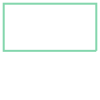

In [50]:
sharp_f_dic[414].iloc[1]['hgs_poly'].boundary